In [1]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=e1870346e7cf40f3cf6985d5afcb483c4b63bb1b78a9568c34b6fb8d03f287fb
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


In [40]:
!pip install matplotlib


In [41]:
from pyspark.sql import SparkSession
from matplotlib import pyplot as plt

In [14]:
spark = SparkSession.builder.appName('Hive_table').getOrCreate()

In [16]:
df = spark.read.csv('/content/BostonHousing-1.csv', header=True, inferSchema=True)

In [17]:
df = df.createOrReplaceTempView("boston_housing_data")

**Task 1 **

First 5 Row

In [20]:
spark.sql("Select * from boston_housing_data").show(5)

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|0.00632|18.0| 2.31|   0|0.538|6.575|65.2|  4.09|  1|296|   15.3| 396.9| 4.98|24.0|
|0.02731| 0.0| 7.07|   0|0.469|6.421|78.9|4.9671|  2|242|   17.8| 396.9| 9.14|21.6|
|0.02729| 0.0| 7.07|   0|0.469|7.185|61.1|4.9671|  2|242|   17.8|392.83| 4.03|34.7|
|0.03237| 0.0| 2.18|   0|0.458|6.998|45.8|6.0622|  3|222|   18.7|394.63| 2.94|33.4|
|0.06905| 0.0| 2.18|   0|0.458|7.147|54.2|6.0622|  3|222|   18.7| 396.9| 5.33|36.2|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
only showing top 5 rows



Total Number of Record

In [22]:
spark.sql("Select count(*) As Total_Record from boston_housing_data").show()

+------------+
|Total_Record|
+------------+
|         506|
+------------+



Task 2: Descriptive Statistics

Calculate and display basic statistics (mean, standard deviation, min, max) for the "medv" (median home value) column.

In [30]:
spark.sql("Select round(avg(medv),2) As Mean,round(std(medv),2) As Standard_Deviation, min(medv) As Min , max(medv)  As Max from  boston_housing_data").show()

+-----+------------------+---+----+
| Mean|Standard_Deviation|Min| Max|
+-----+------------------+---+----+
|22.53|               9.2|5.0|50.0|
+-----+------------------+---+----+



Calculate and display the mean "rm" (average number of rooms per dwelling).

In [33]:
spark.sql("Select round(avg(rm),2) As Mean from boston_housing_data").show()

+----+
|Mean|
+----+
|6.28|
+----+



Task 3: Data Exploration

Identify the property with the highest crime rate ("crim"). Provide details about this property.

In [36]:
spark.sql("Select * from boston_housing_data where ORDER BY crim DESC LIMIT 1 ").show()

+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|   crim| zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|    b|lstat|medv|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+
|88.9762|0.0| 18.1|   0|0.671|6.968|91.9|1.4165| 24|666|   20.2|396.9|17.21|10.4|
+-------+---+-----+----+-----+-----+----+------+---+---+-------+-----+-----+----+



Find and report the property with the lowest median home value ("medv"). Include its details.

In [39]:
spark.sql("Select * from boston_housing_data where ORDER BY medv  LIMIT 1 ").show()

+-------+---+-----+----+-----+-----+-----+------+---+---+-------+-----+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|    b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+-----+-----+----+
|38.3518|0.0| 18.1|   0|0.693|5.453|100.0|1.4896| 24|666|   20.2|396.9|30.59| 5.0|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+-----+-----+----+



Task 4: Data Distribution Analysis

Create a histogram showing the distribution of the "age" column.

In [42]:
age_df = spark.sql("Select age from boston_housing_data")

In [43]:
age_df = age_df.toPandas()

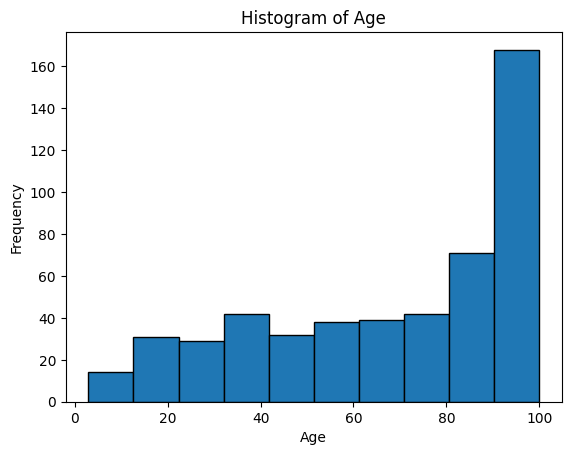

In [48]:
plt.hist(age_df['age'],edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

Calculate and report the percentage of properties with a "chas" value of 1 (indicating proximity to the Charles River).

In [58]:
tr = spark.sql("select count(*) as Total_Count  from boston_housing_data").collect()[0][0]
tk = spark.sql("select count(*) as Total_k  from boston_housing_data where chas = 1").collect()[0][0]

In [61]:
pr = round((tk/tr)*100,2)
print(f"Percentage of properties with a 'chas' value of 1 (indicating proximity to the Charles River) is {pr}")

Percentage of properties with a 'chas' value of 1 (indicating proximity to the Charles River) is 6.92


Task 5: Correlation Analysis

Calculate the correlation coefficient between "rm" and "medv." Explain the relationship between the average number of rooms and median home value.

In [65]:
spark.sql("select round(corr(rm,medv),4) As correlation_coefficient from boston_housing_data").show()

+-----------------------+
|correlation_coefficient|
+-----------------------+
|                 0.6954|
+-----------------------+



Investigate if there is any correlation between "ptratio" (pupil-teacher ratio) and "nox" (nitrogen oxide concentration). Report your findings.

In [68]:
spark.sql("select round(corr(ptratio,nox),4) As correlation_coefficient from boston_housing_data").show()

+-----------------------+
|correlation_coefficient|
+-----------------------+
|                 0.1889|
+-----------------------+



Task 6: Advanced Querying

Write a HiveQL query to identify and display the top 5 neighborhoods with the highest median home values ("medv").


In [71]:
spark.sql("select * from boston_housing_data where ORDER BY medv desc LIMIT 5").show()

+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|   crim|  zn|indus|chas|  nox|   rm| age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+
|1.51902| 0.0|19.58|   1|0.605|8.375|93.9| 2.162|  5|403|   14.7|388.45| 3.32|50.0|
|0.01381|80.0| 0.46|   0|0.422|7.875|32.0|5.6484|  4|255|   14.4|394.23| 2.97|50.0|
|2.01019| 0.0|19.58|   0|0.605|7.929|96.2|2.0459|  5|403|   14.7| 369.3|  3.7|50.0|
|1.83377| 0.0|19.58|   1|0.605|7.802|98.2|2.0407|  5|403|   14.7|389.61| 1.92|50.0|
|1.46336| 0.0|19.58|   0|0.605|7.489|90.8|1.9709|  5|403|   14.7|374.43| 1.73|50.0|
+-------+----+-----+----+-----+-----+----+------+---+---+-------+------+-----+----+



Calculate and report the average property age for neighborhoods with a "chas" value of 1 compared to those with "chas" value of 0.

In [77]:
sp_1 = spark.sql("select avg(age) as avg_age  from boston_housing_data where chas = 1").collect()[0][0]
sp_0 = spark.sql("select avg(age) as avg_age  from boston_housing_data where chas = 0").collect()[0][0]
# Print the results
print(f"Average property age for neighborhoods with 'chas' value of 1: {sp_1:.2f}")
print(f"Average property age for neighborhoods with 'chas' value of 0: {sp_0:.2f}")


Average property age for neighborhoods with 'chas' value of 1: 77.50
Average property age for neighborhoods with 'chas' value of 0: 67.91


Task 7: Visualization



Create a Hive view named "property_age_view" that includes the "age" and "medv" columns.

In [81]:
create_view_query = """
CREATE VIEW property_age_view AS
SELECT age, medv
FROM boston_housing_data
"""


Plot a scatter plot of property age against median home value using a data visualization tool of your choice.

In [83]:
age_pf = spark.sql("Select age from boston_housing_data").toPandas()
medv_pf = spark.sql("Select medv from boston_housing_data").toPandas()

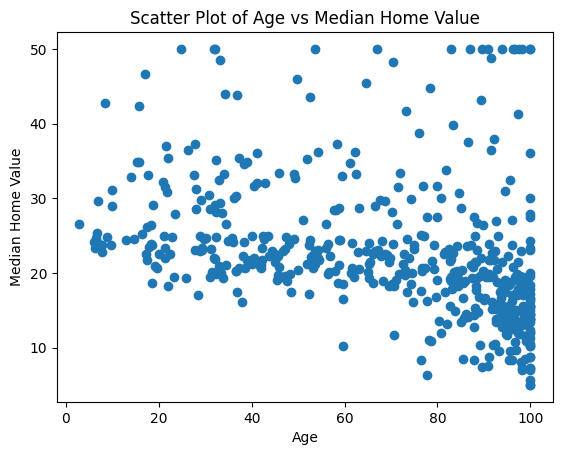

In [84]:
plt.scatter(age_pf['age'], medv_pf['medv'])
plt.xlabel('Age')
plt.ylabel('Median Home Value')
plt.title('Scatter Plot of Age vs Median Home Value')
plt.show()

Task 8: Outliers Detection

Write a query to identify and report properties with a "crim" value greater than 10 (considered as potential outliers).

In [85]:
spark.sql("select * from boston_housing_data where crim > 10").show()

+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|   crim| zn|indus|chas|  nox|   rm|  age|   dis|rad|tax|ptratio|     b|lstat|medv|
+-------+---+-----+----+-----+-----+-----+------+---+---+-------+------+-----+----+
|13.5222|0.0| 18.1|   0|0.631|3.863|100.0|1.5106| 24|666|   20.2|131.42|13.33|23.1|
|11.1081|0.0| 18.1|   0|0.668|4.906|100.0|1.1742| 24|666|   20.2| 396.9|34.77|13.8|
|18.4982|0.0| 18.1|   0|0.668|4.138|100.0| 1.137| 24|666|   20.2| 396.9|37.97|13.8|
|19.6091|0.0| 18.1|   0|0.671|7.313| 97.9|1.3163| 24|666|   20.2| 396.9|13.44|15.0|
| 15.288|0.0| 18.1|   0|0.671|6.649| 93.3|1.3449| 24|666|   20.2|363.02|23.24|13.9|
|23.6482|0.0| 18.1|   0|0.671| 6.38| 96.2|1.3861| 24|666|   20.2| 396.9|23.69|13.1|
|17.8667|0.0| 18.1|   0|0.671|6.223|100.0|1.3861| 24|666|   20.2|393.74|21.78|10.2|
|88.9762|0.0| 18.1|   0|0.671|6.968| 91.9|1.4165| 24|666|   20.2| 396.9|17.21|10.4|
|15.8744|0.0| 18.1|   0|0.671|6.545| 99.1|1.5192| 24|666|   20.2| 396.9|21.0

Formulate a hypothesis about the impact of the "rm" (average number of rooms) on median home value.

In [90]:
spark.sql("select round(corr(rm,medv),2) AS corr from boston_housing_data").show()

+----+
|corr|
+----+
| 0.7|
+----+



Task 9  Hypothesis Testing

Null Hypothesis (H₀): Assumes there is no relationship or impact between rm and medv. If statistical analysis fails to reject this hypothesis, it would imply that changes in rm do not lead to significant changes in medv.



Alternative Hypothesis (H₁): Assumes there is indeed a relationship between rm and medv. A rejection of the null hypothesis in favor of the alternative would suggest that changes in rm are associated with changes in medv, either positively or negatively.

In [92]:
rm_v  = spark.sql("select rm from boston_housing_data").toPandas()
medv_v = spark.sql("select medv from boston_housing_data").toPandas()

In [93]:
import pandas as pd
from scipy import stats

In [96]:
t_stat, p_value = stats.ttest_ind(rm_v, medv_v)

In [99]:
# Step 5: Interpret Results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: [-39.6246115]
P-value: [6.4901675e-208]



Since the t-statistic is negative, it indicates that as the average number of rooms (rm) increases, the median home value (medv) tends to decrease. However, this relationship should be interpreted cautiously and further analysis may be required to understand the nature and direction of this relationship more comprehensively.

In summary, your analysis using the t-test suggests that there is a statistically significant relationship between the number of rooms and median home values in the Boston Housing Dataset.





